In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


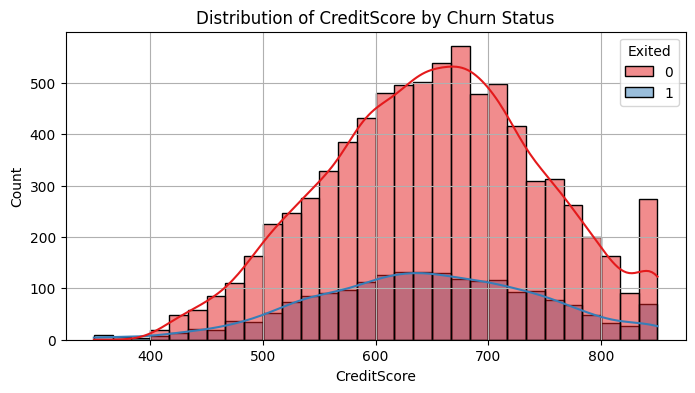

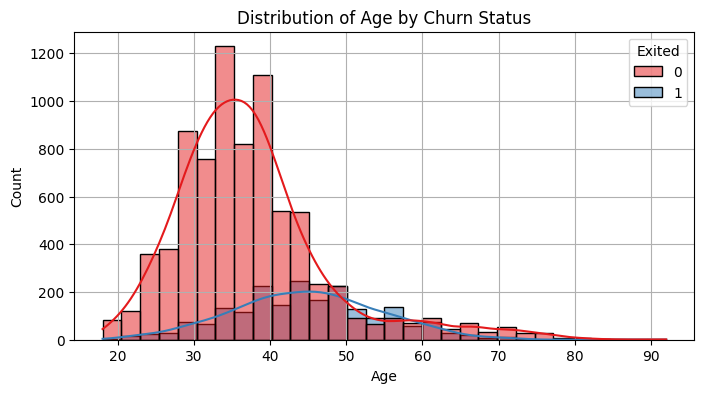

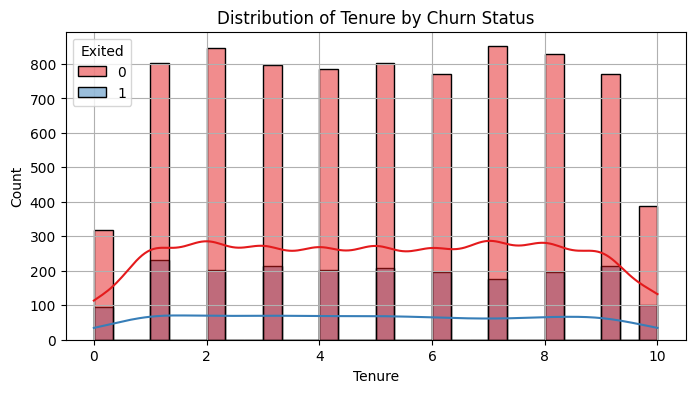

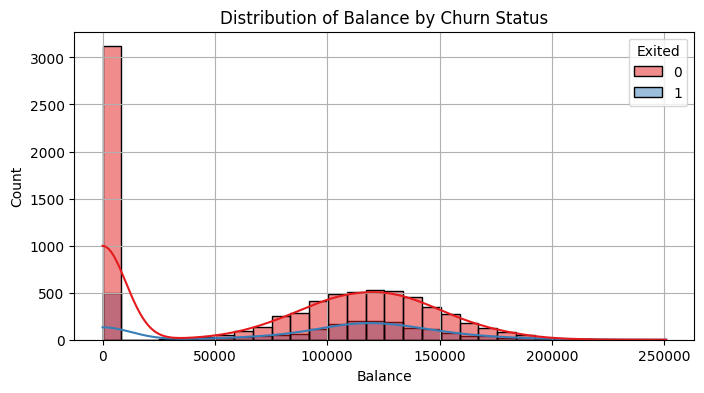

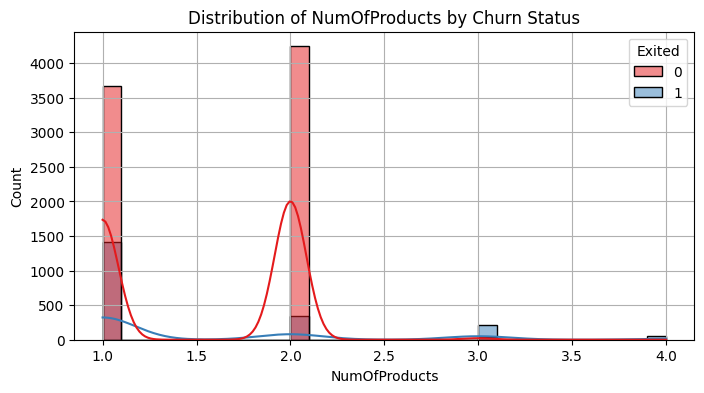

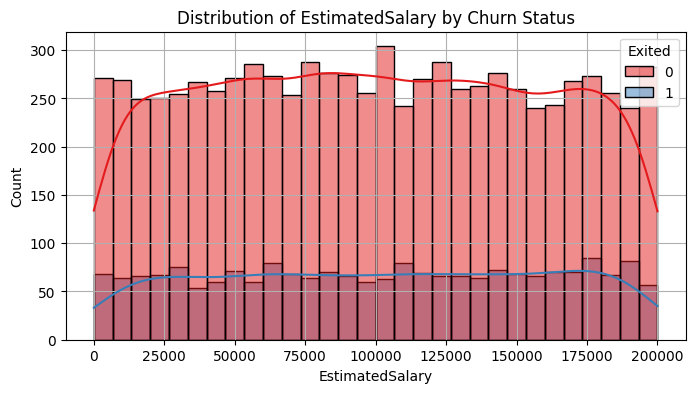

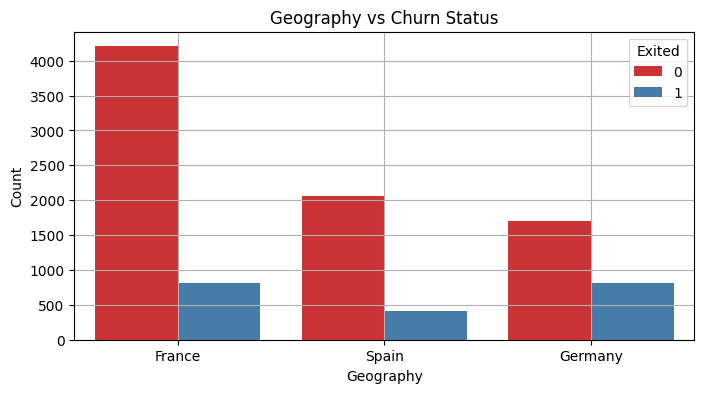

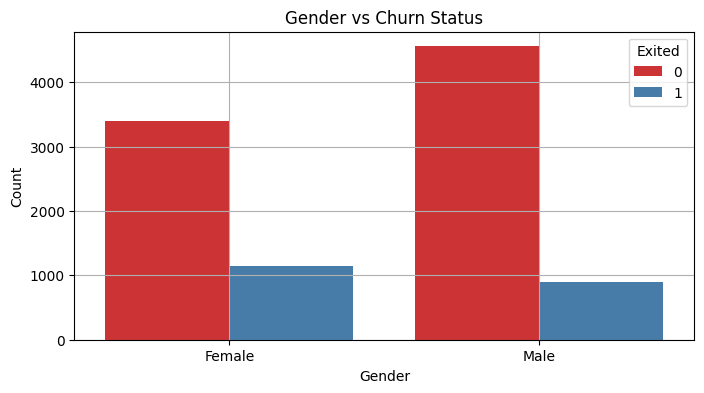

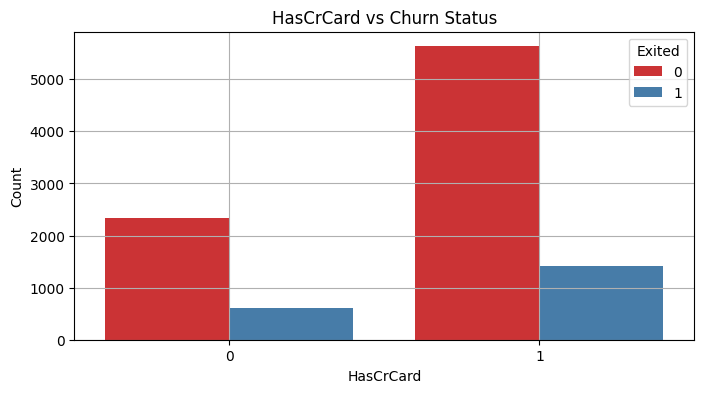

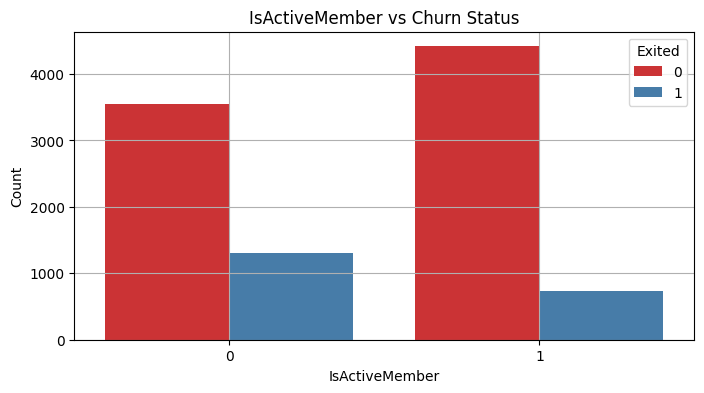

In [9]:
# 1. Numerical Features - Distribution by Churn
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Exited', kde=True, bins=30, palette='Set1')
    plt.title(f'Distribution of {col} by Churn Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# 2. Categorical/Binary Features - Count Plot by Churn
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Exited', data=df, palette='Set1')
    plt.title(f'{col} vs Churn Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


In [10]:
# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [13]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [14]:
X = df.drop('Exited', axis=1)
y = df['Exited']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

🔵 Model: Logistic Regression
Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

🔵 Model: Random Forest
Accuracy: 0.866
Confusion Matrix:
 [[1552   55]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

🔵 Model: K-Nearest Neighbors
Accuracy: 0.8295
Confusion Matrix:
 [[1513   94]
 [ 247  146]]
              precision    recall  f1-score   support

           0       0.86

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:30:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔵 Model: XGBoost
Accuracy: 0.864
Confusion Matrix:
 [[1526   81]
 [ 191  202]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



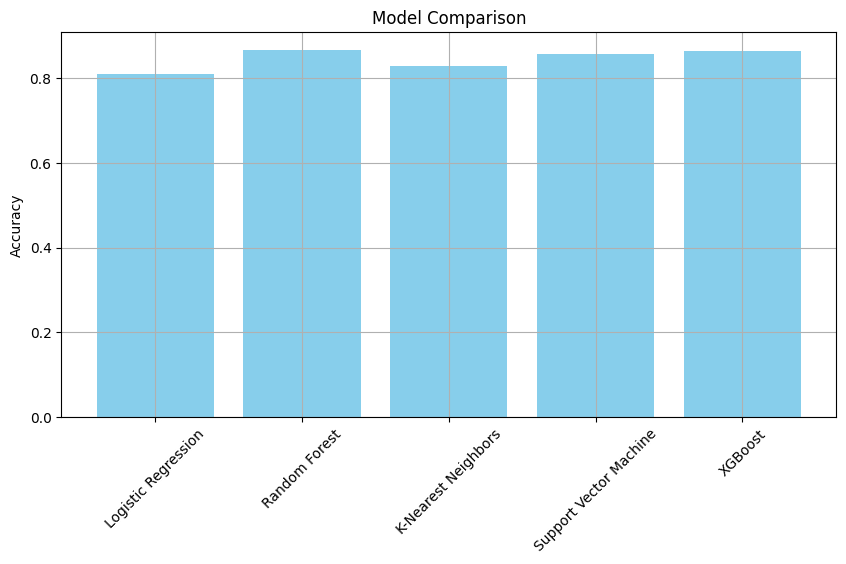

In [18]:
# 1. Import all models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 3. Train and Evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔵 Model: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*50)
    results[name] = acc

# 4. Visualize model performance
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


🔵 Model: Logistic Regression
Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

🔵 Model: Random Forest
Accuracy: 0.866
Confusion Matrix:
 [[1552   55]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

🔵 Model: K-Nearest Neighbors
Accuracy: 0.8295
Confusion Matrix:
 [[1513   94]
 [ 247  146]]
              precision    recall  f1-score   support

           0       0.86

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:32:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000

🔵 Model: Decision Tree
Accuracy: 0.785
Confusion Matrix:
 [[1372  235]
 [ 195  198]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.50      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.79      0.79      2000

🔵 Model: Gradient Boosting
Accuracy: 0.8675
Confusion Matrix:
 [[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    acc

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


🔵 Model: LightGBM
Accuracy: 0.865
Confusion Matrix:
 [[1536   71]
 [ 199  194]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.73      0.49      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

🔵 Model: Naive Bayes
Accuracy: 0.8335
Confusion Matrix:
 [[1526   81]
 [ 252  141]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000

🔵 Model: Bagging
Accuracy: 0.851
Confusion Matrix:
 [[1523   84]
 [ 214  179]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


🔵 Model: MLP
Accuracy: 0.863
Confusion Matrix:
 [[1518   89]
 [ 185  208]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.70      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.86      2000

🔵 Model: QDA
Accuracy: 0.837
Confusion Matrix:
 [[1524   83]
 [ 243  150]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.38      0.48       393

    accuracy                           0.84      2000
   macro avg       0.75      0.67      0.69      2000
weighted avg       0.82      0.84      0.82      2000

🔵 Model: Ridge Classifier
Accuracy: 0.813
Confusion Matrix:
 [[1574   33]
 [ 341   52]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1607

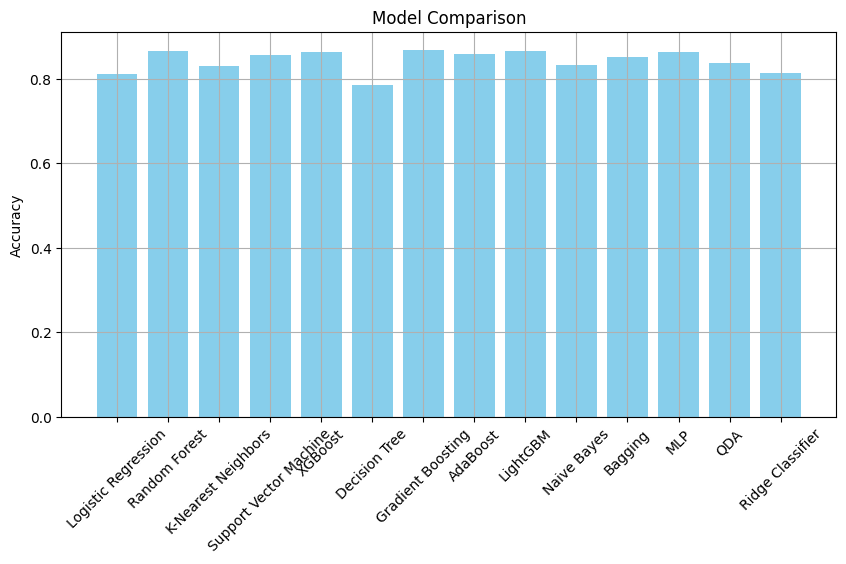

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier

# Adding new models
models.update({
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Bagging": BaggingClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier()
})

# Training and evaluating models (same code as before)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔵 Model: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*50)
    results[name] = acc

# Visualizing model performance
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
